### Problem Statement

You are a data scientist working on a classification problem to predict whether a hotel reservation will be canceled or not. You have been provided with a dataset named **`"hotel_reservations.csv"`**, which includes various attributes related to hotel bookings. The dataset comprises the following columns:

- `booking_id:` unique identifier of each booking
- `no_of_adults:` Number of adults
- `no_of_children:` Number of Children
- `no_of_weekend_nights:` Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `no_of_week_nights:` Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `type_of_meal_plan:` Type of meal plan booked by the customer
- `required_car_parking_space:` Does the customer require a car parking space? (0 - No, 1- Yes)
- `room_type_reserved:` Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels
- `lead_time:` Number of days between the date of booking and the arrival date
- `arrival_year:` Year of arrival date
- `arrival_month:` Month of arrival date
- `arrival_date:` Date of the month
- `market_segment_type:` Market segment designation
- `repeated_guest:` Is the customer a repeated guest? (0 - No, 1- Yes)
- `no_of_previous_cancellations:` Number of previous bookings that were canceled by the customer prior to the current booking
- `no_of_previous_bookings_not_canceled:` Number of previous bookings not canceled by the customer prior to the current booking
- `avg_price_per_room:` Average price per day of the reservation; prices of the rooms are dynamic (in euros)
- `no_of_special_requests:` Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- `booking_status:` Flag indicating if the booking was canceled or not (Not_Canceled = 0, Canceled = 1)


You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, random forest, and Naive Bayes. Additionally, you will implement k-fold cross-validation, stratified k-fold cross-validation, grid search, and randomized search techniques.

**Dataset Credits:** Ahsan Raza (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

**Import Necessary Libraries**


In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Task 1: Data Preprocessing and EDA

1. Import the data from the `"hotel_reservations.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
5. Remove the columns `booking_id, arrival_year, arrival_month, and arrival_date` as they do not add significant value to the predictive model.
6. Visualize the booking_status using a count plot.
7. Visualize the lead time for canceled and not canceled bookings using a box plot.
8. Visualize the average price per room for canceled and not canceled bookings using a box plot.
9. Encode categorical variables: type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.

In [2]:
df = pd.read_csv("hotel_reservations.csv")
print(df.shape)
df.head()

(36275, 19)


,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.isna().sum()

booking_id                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [4]:
df.drop(["arrival_year","arrival_month","arrival_date"],axis=1,inplace=True)
df.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled


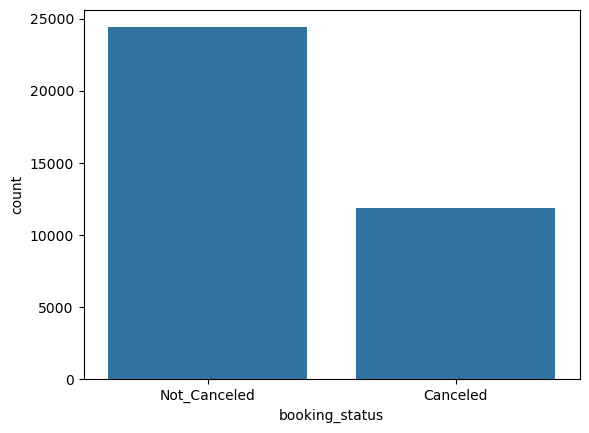

In [5]:
# df["booking_status"].value_counts().plot(kind="bar")
# plt.xticks(rotation=45)
# plt.show()

# Or

sb.countplot(data=df,x="booking_status")
plt.show()

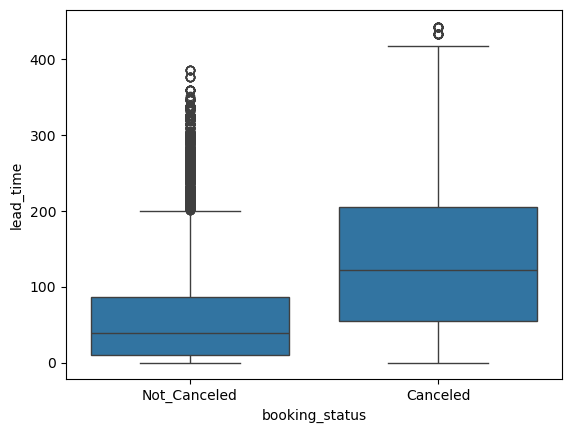

In [6]:
sb.boxplot(data=df,x="booking_status",y="lead_time")
plt.show()

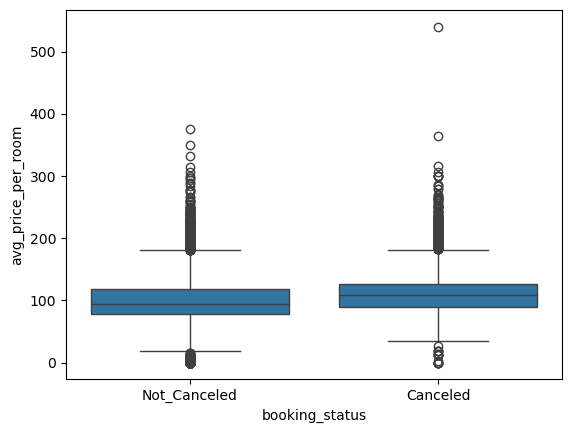

In [7]:
sb.boxplot(data=df,x="booking_status",y="avg_price_per_room")
plt.show()

In [8]:
features = ["type_of_meal_plan","room_type_reserved","market_segment_type"]
encoded_df = pd.get_dummies(df,columns=features,drop_first=True)
encoded_df.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0,224,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,INN00002,2,0,2,3,0,5,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,INN00003,1,0,2,1,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,INN00004,2,0,0,2,0,211,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,INN00005,2,0,1,1,0,48,0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [9]:
encoded_df.drop("booking_id",axis=1,inplace=True)


In [10]:
encoded_df["booking_status"].head()

0    Not_Canceled
1    Not_Canceled
2        Canceled
3        Canceled
4        Canceled
Name: booking_status, dtype: object

### Task 2: Feature Scaling

1. Standardize the numerical features `lead_time` and `avg_price_per_room`.
2. Define features (X) and target (y).

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoded_df[["lead_time","avg_price_per_room"]] = scaler.fit_transform(encoded_df[["lead_time","avg_price_per_room"]])

X = encoded_df.drop("booking_status",axis=1)
y = encoded_df["booking_status"]

### Task 3: Implementing K-Fold Cross Validation

1. Initialize a KFold cross-validator with 7 splits.
2. Perform k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform k-fold cross-validation using a decision tree classifier and calculate the average accuracy.

In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold

kf = KFold(n_splits=7,shuffle=True,random_state=42)

model1 = cross_val_score(GaussianNB(),X,y,cv=kf)
print(f"Average accuracy of Naive Bayes model is {np.mean(model1)}")

model2 = cross_val_score(DecisionTreeClassifier(),X,y,cv=kf)
print(f"Average accuracy of DecisionTreeClassifier model is {np.mean(model2)}")

model3 = cross_val_score(LogisticRegression(max_iter=200),X,y,cv=kf)
print(f"Average accuracy of LogisticRegression model is {np.mean(model3)}")


Average accuracy of Naive Bayes model is 0.4086008945293444
Average accuracy of DecisionTreeClassifier model is 0.8556030887215512
Average accuracy of LogisticRegression model is 0.8004685935356991


### Task 4: Implementing Stratified K-Fold Cross Validation

1. Initialize a StratifiedKFold cross-validator with 7 splits
2. Perform stratified k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform stratified k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform stratified k-fold cross-validation using a Decision Tree classifier and calculate the average accuracy.

In [20]:
skf = StratifiedKFold(n_splits=7,shuffle=True,random_state=42)

model1 = cross_val_score(GaussianNB(),X,y,cv=skf)
print(f"Average accuracy of Naive Bayes model is {np.mean(model1)}")

model2 = cross_val_score(DecisionTreeClassifier(),X,y,cv=skf)
print(f"Average accuracy of DecisionTreeClassifier model is {np.mean(model2)}")

model3 = cross_val_score(LogisticRegression(max_iter=200),X,y,cv=skf)
print(f"Average accuracy of LogisticRegression model is {np.mean(model3)}")

Average accuracy of Naive Bayes model is 0.40862851035462067
Average accuracy of DecisionTreeClassifier model is 0.8592694246188549
Average accuracy of LogisticRegression model is 0.7997243385342322


### Task 5: Implementing Grid Search CV

1. Initialize GridSearchCV with Naive Bayes and Random Forest:
    - Naive Bayes: var_smoothing [1e-9, 1e-8, 1e-7]
    - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15]
<br></br>
2. Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
3. Print the best parameters for each model.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model_params = {
    'naive_bayes':{
        'model':GaussianNB(),
        'params':{
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100],
            'max_depth':[5,10,15],
            'criterion':["gini","entropy"]
        }
    }
}

scores = []

for key,value in model_params.items():
    clf = GridSearchCV(
        value['model'],
        value['params'],
        cv=7,
        return_train_score=False
    )
    clf.fit(X,y)
    scores.append({
        'model':key,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
print(scores)

[{'model': 'naive_bayes', 'best_score': 0.40948309036530983, 'best_params': {'var_smoothing': 1e-07}}, {'model': 'random_forest', 'best_score': 0.8774361591212363, 'best_params': {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 50}}]


In [23]:
df = pd.DataFrame(scores,columns=["model","best_score","best_params"])
df

,model,best_score,best_params
0,naive_bayes,0.409483,{'var_smoothing': 1e-07}
1,random_forest,0.877436,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."


### Task 6: Implementing Randomized Search CV

1. Initialize RandomizedSearchCV for RandomForest with the given parameters:
   - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15, 20]
<br></br>
2. Fit RandomizedSearchCV with RandomForest model and find the best parameters.
2. Print the best parameters.

In [32]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(
    RandomForestClassifier(),
    {
        'n_estimators':[10,50,100],
        'max_depth':[5,10,15,20]
    },
    n_iter=3,
    cv=7,
    return_train_score=False
)

clf.fit(X,y)
clf.cv_results_

{'mean_fit_time': array([0.25182366, 1.7461351 , 0.43200997]),
 'std_fit_time': array([0.03183976, 0.08685282, 0.04111603]),
 'mean_score_time': array([0.02411073, 0.05889869, 0.02721834]),
 'std_score_time': array([0.00341813, 0.00228123, 0.00563431]),
 'param_n_estimators': masked_array(data=[10, 100, 10],
              mask=[False, False, False],
        fill_value=999999),
 'param_max_depth': masked_array(data=[5, 5, 15],
              mask=[False, False, False],
        fill_value=999999),
 'params': [{'n_estimators': 10, 'max_depth': 5},
  {'n_estimators': 100, 'max_depth': 5},
  {'n_estimators': 10, 'max_depth': 15}],
 'split0_test_score': array([0.80995562, 0.80416747, 0.87767702]),
 'split1_test_score': array([0.77055191, 0.8031648 , 0.87861829]),
 'split2_test_score': array([0.80798919, 0.7960247 , 0.87186415]),
 'split3_test_score': array([0.79062138, 0.7881127 , 0.87186415]),
 'split4_test_score': array([0.8103049 , 0.7873408 , 0.87707449]),
 'split5_test_score': array([0.8

In [33]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.251824,0.031840,0.024111,0.003418,10,5,"{'n_estimators': 10, 'max_depth': 5}",0.809956,0.770552,0.807989,0.790621,0.810305,0.805095,0.785604,0.797160,0.014147,2
1,1.746135,0.086853,0.058899,0.002281,100,5,"{'n_estimators': 100, 'max_depth': 5}",0.804167,0.803165,0.796025,0.788113,0.787341,0.792165,0.790814,0.794541,0.006346,3
2,0.432010,0.041116,0.027218,0.005634,10,15,"{'n_estimators': 10, 'max_depth': 15}",0.877677,0.878618,0.871864,0.871864,0.877074,0.870127,0.872636,0.874266,0.003157,1


In [34]:
clf.best_params_

{'n_estimators': 10, 'max_depth': 15}